# Okie Dokie, we tryna recreate the og model's dataset. woo.

In [1]:
def smooth_ts(unsmoothed):
    smoothed = unsmoothed.rolling(tdim=3, center=True).mean()
    smoothed[0] = (unsmoothed[0] + unsmoothed[1]) / 2
    smoothed[-1] = (unsmoothed[-1] + unsmoothed[-2]) / 2
    return smoothed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import datetime
from dateutil.relativedelta import relativedelta

from cartopy import crs as ccrs, feature as cfeature
import warnings
warnings.filterwarnings('ignore') 

import xarray as xr
import glob, os

from eofs.xarray import Eof
from eofs.standard import Eof as sEof # If needed
from eofs.multivariate.standard import MultivariateEof

sp = ccrs.SouthPolarStereo()
pc = ccrs.PlateCarree()

## 2. SIC Anomaly:

In [3]:
filename = '/d6/bxw2101/o_combined_netcdf_files/o_sic_anom_monthly_1x0p5.nc'
sic_anom_ds = xr.open_dataset(filename)
sic_anom_ds = sic_anom_ds.fillna(0)
# save here to netcdf.

In [4]:
sic_1x0p5 = sic_anom_ds.assign(sic_anom_smoothed = smooth_ts(sic_anom_ds.sic_anom))

In [6]:
sic_1x0p5

<xarray.Dataset>
Dimensions:            (tdim: 264, y: 80, x: 360)
Coordinates:
  * y                  (y) float64 -89.5 -89.0 -88.5 -88.0 ... -51.0 -50.5 -50.0
  * x                  (x) float64 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * tdim               (tdim) datetime64[ns] 1979-01-01 ... 2000-12-01
Data variables:
    sic_anom           (tdim, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    sic_anom_smoothed  (tdim, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

## 3. All other variables Anomaly:

In [14]:
filename = '/d6/bxw2101/o_combined_netcdf_files/o_sst_anom_monthly_2x2.nc'
sst_anom_ds = xr.open_dataset(filename)
sst_anom_ds = sst_anom_ds.rename({'X': 'x', 'Y': 'y'}).fillna(0)

In [8]:
filename = '/d6/bxw2101/o_combined_netcdf_files/o_era5_anom_monthly_2x2.nc'
era5_anom_ds = xr.open_dataset(filename)
era5_anom_ds = era5_anom_ds.rename(t2m='sat_anom', z='z_anom', u='u_anom', v='v_anom', sthf = 'sthf_anom')

In [16]:
# Save the variables into two xarray datasets:
vars_2x2 = xr.merge([sst_anom_ds.sst_anom, era5_anom_ds.sat_anom, era5_anom_ds.z_anom, era5_anom_ds.u_anom, era5_anom_ds.v_anom, era5_anom_ds.sthf_anom])

In [17]:
vars_2x2 = vars_2x2.assign(sst_anom_smoothed = smooth_ts(vars_2x2.sst_anom))
vars_2x2 = vars_2x2.assign(sat_anom_smoothed = smooth_ts(vars_2x2.sat_anom))
vars_2x2 = vars_2x2.assign(z_anom_smoothed = smooth_ts(vars_2x2.z_anom))
vars_2x2 = vars_2x2.assign(u_anom_smoothed = smooth_ts(vars_2x2.u_anom))
vars_2x2 = vars_2x2.assign(v_anom_smoothed = smooth_ts(vars_2x2.v_anom))
vars_2x2 = vars_2x2.assign(sthf_anom_smoothed = smooth_ts(vars_2x2.sthf_anom))

In [18]:
vars_2x2 

<xarray.Dataset>
Dimensions:             (x: 180, tdim: 264, y: 20)
Coordinates:
  * x                   (x) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * tdim                (tdim) datetime64[ns] 1979-01-01 ... 2000-12-01
  * y                   (y) float32 -88.0 -86.0 -84.0 ... -54.0 -52.0 -50.0
Data variables:
    sst_anom            (tdim, y, x) float32 0.0 0.0 0.0 ... -0.4457 -0.4944
    sat_anom            (tdim, y, x) float32 -1.09 -1.057 ... -0.168 -0.3328
    z_anom              (tdim, y, x) float32 -21.64 -21.61 ... -4.656 -5.563
    u_anom              (tdim, y, x) float32 -0.5129 -0.5101 ... 0.476 0.3969
    v_anom              (tdim, y, x) float32 -0.08244 -0.09217 ... 0.2992 0.8349
    sthf_anom           (tdim, y, x) float32 9.949e+04 9.784e+04 ... -2.823e+05
    sst_anom_smoothed   (tdim, y, x) float32 0.0 0.0 0.0 ... -0.416 -0.4446
    sat_anom_smoothed   (tdim, y, x) float32 -0.07281 -0.04013 ... -0.2556
    z_anom_smoothed     (tdim, y, x) float32 -19.65 -19.61 ... -17.24 -16.53
    u_anom_smoothed     (tdim, y, x) float32 -0.5093 -0.5235 ... -0.2266
    v_anom_smoothed     (tdim, y, x) float32 0.1452 0.1263 ... -0.4883 -0.3104
    sthf_anom_smoothed  (tdim, y, x) float32 1.877e+05 1.846e+05 ... -6.008e+05

## Testing to make sure smoothed files are properly smoothed and they work! (It seems like they do. YAY!)

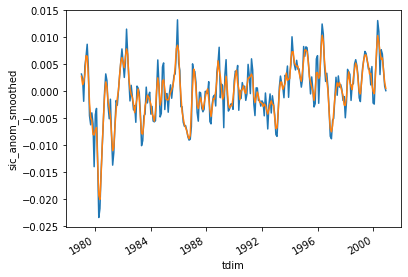

In [19]:
sic_1x0p5.sic_anom.mean(dim=['x', 'y']).plot()
sic_1x0p5.sic_anom_smoothed.mean(dim=['x', 'y']).plot()

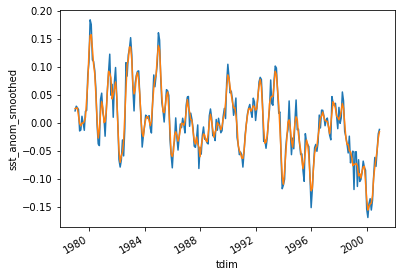

In [20]:
vars_2x2.sst_anom.mean(dim=['x', 'y']).plot()
vars_2x2.sst_anom_smoothed.mean(dim=['x', 'y']).plot()

## 4. Save the two files to NetCDF:

In [23]:
vars_2x2.to_netcdf('/d6/bxw2101/o_model_files/datasets/vars_2x2.nc', mode='w',format='NETCDF4')
sic_1x0p5.to_netcdf('/d6/bxw2101/o_model_files/datasets/sic_1x0p5.nc', mode='w',format='NETCDF4')